### process uavsar multi segment sierra line
jack tarricone
nov 16th start

In [10]:
%matplotlib inline
import isce
import os
import glob
import numpy as np
import shutil
from osgeo import gdal
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show # plotting raster data
from rasterio.plot import show_hist #histograms of raster data
from uavsar_pytools.georeference import geolocate_uavsar

In [2]:
# get home dir
home = '/Users/jtarrico/'
os.chdir(home)
os.getcwd()

'/Users/jtarrico'

In [3]:
# working folder name
isce_directory = 'sierra_isce_multi'
    
# path to folder
working_dir = os.path.join(home,isce_directory)

In [6]:
# make new folder
# os.mkdir(working_dir)
print("Directory '%s' created" %isce_directory)

Directory 'sierra_isce_multi' created


In [4]:
# nativate to new folder
os.chdir(working_dir)
os.getcwd()

'/Users/jtarrico/sierra_isce_multi'

In [9]:
## create subdirectories

# download
dl = 'download'
download_path = os.path.join(working_dir,dl)
# os.mkdir(download_path)

In [10]:
# check folders were created
for file in os.listdir(working_dir):
    d = os.path.join(working_dir, file)
    if os.path.isdir(d):
        print(d)

/Users/jtarrico/sierra_isce_multi/download


# nativate to download folder
os.chdir(download_path)
os.getcwd()

## download

In [11]:
# create .sh file from links

links = ['wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC.dop',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC_s1_1x1.llh',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC_s1_1x1.lkv',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC_s2_1x1.llh',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_01_BC_s2_1x1.lkv',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20002_001_200131_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20006_002_200212_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20009_023_200219_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20016_005_200311_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20014_000_200226_L090VV_01_BC.ann',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20002_001_200131_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20006_002_200212_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20009_023_200219_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20014_000_200226_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20016_005_200311_L090VV_01_BC_s1_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20002_001_200131_L090VV_01_BC_s2_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20006_002_200212_L090VV_01_BC_s2_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20009_023_200219_L090VV_01_BC_s2_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20014_000_200226_L090VV_01_BC_s2_1x1.slc',
'wget https://downloaduav2.jpl.nasa.gov/Release30/sierra_17305_01/sierra_17305_20016_005_200311_L090VV_01_BC_s2_1x1.slc']

with open('downloads.sh', 'w') as f:
    for links in links:
        f.write(links)
        f.write('\n')

In [12]:
# list files downloaded
for i in os.listdir(download_path):
    file = os.path.join(download_path, i)
    print(file)

/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20002_001_200131_L090VV_01_BC_s2_1x1.slc
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20009_023_200219_L090VV_01_BC.ann
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20009_023_200219_L090VV_01_BC_s2_1x1.slc
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20006_002_200212_L090VV_01_BC_s1_1x1.slc
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20014_000_200226_L090VV_01_BC_s1_1x1.slc
/Users/jtarrico/sierra_isce_multi/download/.DS_Store
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_01_BC.dop
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20016_005_200311_L090VV_01_BC_s2_1x1.slc
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_01_BC_s1_2x8.llh
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20006_002_200212_L090VV_01_BC.ann
/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20009_023_200219_L090VV_01_BC_s1_1x1.slc
/Users/jtarrico/sierra_isce_multi/download/sie

## merge segments

add these scripts to the stripmapp folder

```pair.py``` \
```group_segments_dayhrmin_4isce.py``` \
```make_ifg_vrt_xml_isce.py``` \
```insar.py``` \
```make_slc_vrt_xml_isce.py``` \
```cat_and_interfere_py3.py``` \
```unpackFrame_UAVSAR_JPLcode.py``` 

In [28]:
# nativate to new folder
os.chdir('./download')
os.getcwd()

'/Users/jtarrico/sierra_isce_multi/download'

In [31]:
# read segments
! group_segments_dayhrmin_4isce.py . > images.json

In [32]:
# generate ancillary files
! make_slc_vrt_xml_isce.py ./

8874 66664
8874 63032
unpackFrame_UAVSAR_JPLcode.py -i sierra_17305_20002_001_200131_L090VV_01_BC.ann -d ./sierra_17305_01_BC.dop -l 129696 -o ./20200131T1903
2023-11-16 12:38:37,914 - isce.Sensor.UAVSAR_Stack - INFO - extractDoppler: rho0, drho, prf = 11558.5978, 1.66551366, 445.46146464548985
2023-11-16 12:38:37,935 - isce.Sensor.UAVSAR_Stack - INFO - coeffs = [-1.18618649e+00  7.59851272e-04 -2.52651503e-07  5.67221397e-11
 -7.83341009e-15  5.86456631e-19 -1.80564378e-23]
2023-11-16 12:38:37,936 - isce.Sensor.UAVSAR_Stack - INFO - rms residual = [0.00114148]
2023-11-16 12:38:37,994 - isce.Sensor.UAVSAR_Stack - INFO - UAVSAR_Stack.extractDoppler: self.dopplerVals = {'Near': -1.1861864913881197}
2023-11-16 12:38:37,994 - isce.Sensor.UAVSAR_Stack - INFO - UAVSAR_Stack.extractDoppler: prf = 445.46146464548985
2023-11-16 12:38:38,001 - isce.Sensor.UAVSAR_Stack - INFO - UAVSAR_Stack: peg radius of curvature = 6361990.437831623
2023-11-16 12:38:38,001 - isce.Sensor.UAVSAR_Stack - INFO - UA

In [39]:
# create pairs .txt
! pair.py -n 1 < images.json > pairs.txt

In [40]:
# form insar pairs at 8x2
! cat_and_interfere_py3.py -d int -r 2 -a 8 images.json pairs.txt

Generating interferogram 20200131T1903_20200212T2211.int looked 2x8
... sierra_17305_20002_001_200131_L090VV_01_BC_s1_1x1.slc * conj(sierra_17305_20006_002_200212_L090VV_01_BC_s1_1x1.slc)
... sierra_17305_20002_001_200131_L090VV_01_BC_s2_1x1.slc * conj(sierra_17305_20006_002_200212_L090VV_01_BC_s2_1x1.slc)
Generating interferogram 20200212T2211_20200219T2208.int looked 2x8
... sierra_17305_20006_002_200212_L090VV_01_BC_s1_1x1.slc * conj(sierra_17305_20009_023_200219_L090VV_01_BC_s1_1x1.slc)
... sierra_17305_20006_002_200212_L090VV_01_BC_s2_1x1.slc * conj(sierra_17305_20009_023_200219_L090VV_01_BC_s2_1x1.slc)
Generating interferogram 20200219T2208_20200226T2253.int looked 2x8
... sierra_17305_20009_023_200219_L090VV_01_BC_s1_1x1.slc * conj(sierra_17305_20014_000_200226_L090VV_01_BC_s1_1x1.slc)
... sierra_17305_20009_023_200219_L090VV_01_BC_s2_1x1.slc * conj(sierra_17305_20014_000_200226_L090VV_01_BC_s2_1x1.slc)
Generating interferogram 20200226T2253_20200311T1852.int looked 2x8
... sier

In [41]:
# gen more anc files
! make_ifg_vrt_xml_isce.py -i int/

API open (R): int/20200212T2211_20200219T2208/20200212T2211_20200219T2208.int
API close:  int/20200212T2211_20200219T2208/20200212T2211_20200219T2208.int
API open (R): int/20200212T2211_20200219T2208/20200212T2211_20200219T2208.amp
API close:  int/20200212T2211_20200219T2208/20200212T2211_20200219T2208.amp
API open (R): int/20200212T2211_20200219T2208/20200212T2211_20200219T2208.cor
API close:  int/20200212T2211_20200219T2208/20200212T2211_20200219T2208.cor
API open (R): int/20200219T2208_20200226T2253/20200219T2208_20200226T2253.int
API close:  int/20200219T2208_20200226T2253/20200219T2208_20200226T2253.int
API open (R): int/20200219T2208_20200226T2253/20200219T2208_20200226T2253.amp
API close:  int/20200219T2208_20200226T2253/20200219T2208_20200226T2253.amp
API open (R): int/20200219T2208_20200226T2253/20200219T2208_20200226T2253.cor
API close:  int/20200219T2208_20200226T2253/20200219T2208_20200226T2253.cor
API open (R): int/20200131T1903_20200212T2211/20200131T1903_20200212T2211.in

## test plot

In [ ]:
w_int = './int/20200131T1903_20200212T2211/20200131T1903_20200212T2211.int.vrt'
coh_path = './int/20200131T1903_20200212T2211/20200131T1903_20200212T2211.cor.vrt'

# read int
ds = gdal.Open(w_int, gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

# read
coh_ds = gdal.Open(coh_path, gdal.GA_ReadOnly)
coh = coh_ds.GetRasterBand(1).ReadAsArray()
coh_ds = None

fig = plt.figure(figsize=(18, 14))

ax = fig.add_subplot(1,3,1)
ax.imshow(np.abs(igram), vmin = 0, vmax = .3, cmap = 'gray')
ax.set_title("Magnitude")
ax.set_axis_off()

ax = fig.add_subplot(1,3,2)
ax.imshow(np.angle(igram), cmap = 'jet', vmax = 3.14, vmin = -3.14)
ax.set_title("Phase")
ax.set_axis_off()

ax = fig.add_subplot(1,3,3)
ax.imshow(coh, vmin = 0 , vmax = 1, cmap = 'gray')
ax.set_title("Coherence")
ax.set_axis_off()

# Phase Unwrapping

In [ ]:
# start in downloads directory
os.chdir('/Users/jtarrico/sierra_isce_multi/')

In [ ]:
# create text file of date list
! ls --color=never int/ >> datelist.txt

In [ ]:
# print contents of that file
with open('datelist.txt') as f:
    lines = f.readlines()
    print(lines)

In [ ]:
! unwrap.py -h

In [ ]:
# run snaphu, this will take a while
! awk -F "_" '{print "unwrap.py -i int/"$1"_"$2"/"$1"_"$2".int -u int/"$1"_"$2"/"$1"_"$2".unw -c int/"$1"_"$2"/"$1"_"$2".coh -a 8 -r 2 -s download/"$1"/ -m snaphu"}' datelist.txt >> unwall.sh

In [ ]:
! sh unwall.sh

In [44]:
# start in downloads directory
os.chdir('/Users/jtarrico/sierra_isce_multi/')

In [46]:
# list files generated in unwrapping process
!ls int_orginal/*/*

int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.amp
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.amp.vrt
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.amp.xml
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.coh
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.coh.vrt
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.coh.xml
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.int
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.int.vrt
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.int.xml
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw.conncomp
int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw.conncomp.vrt
int_orginal/20200131T1903_20200212T2211/20200131T1903_202

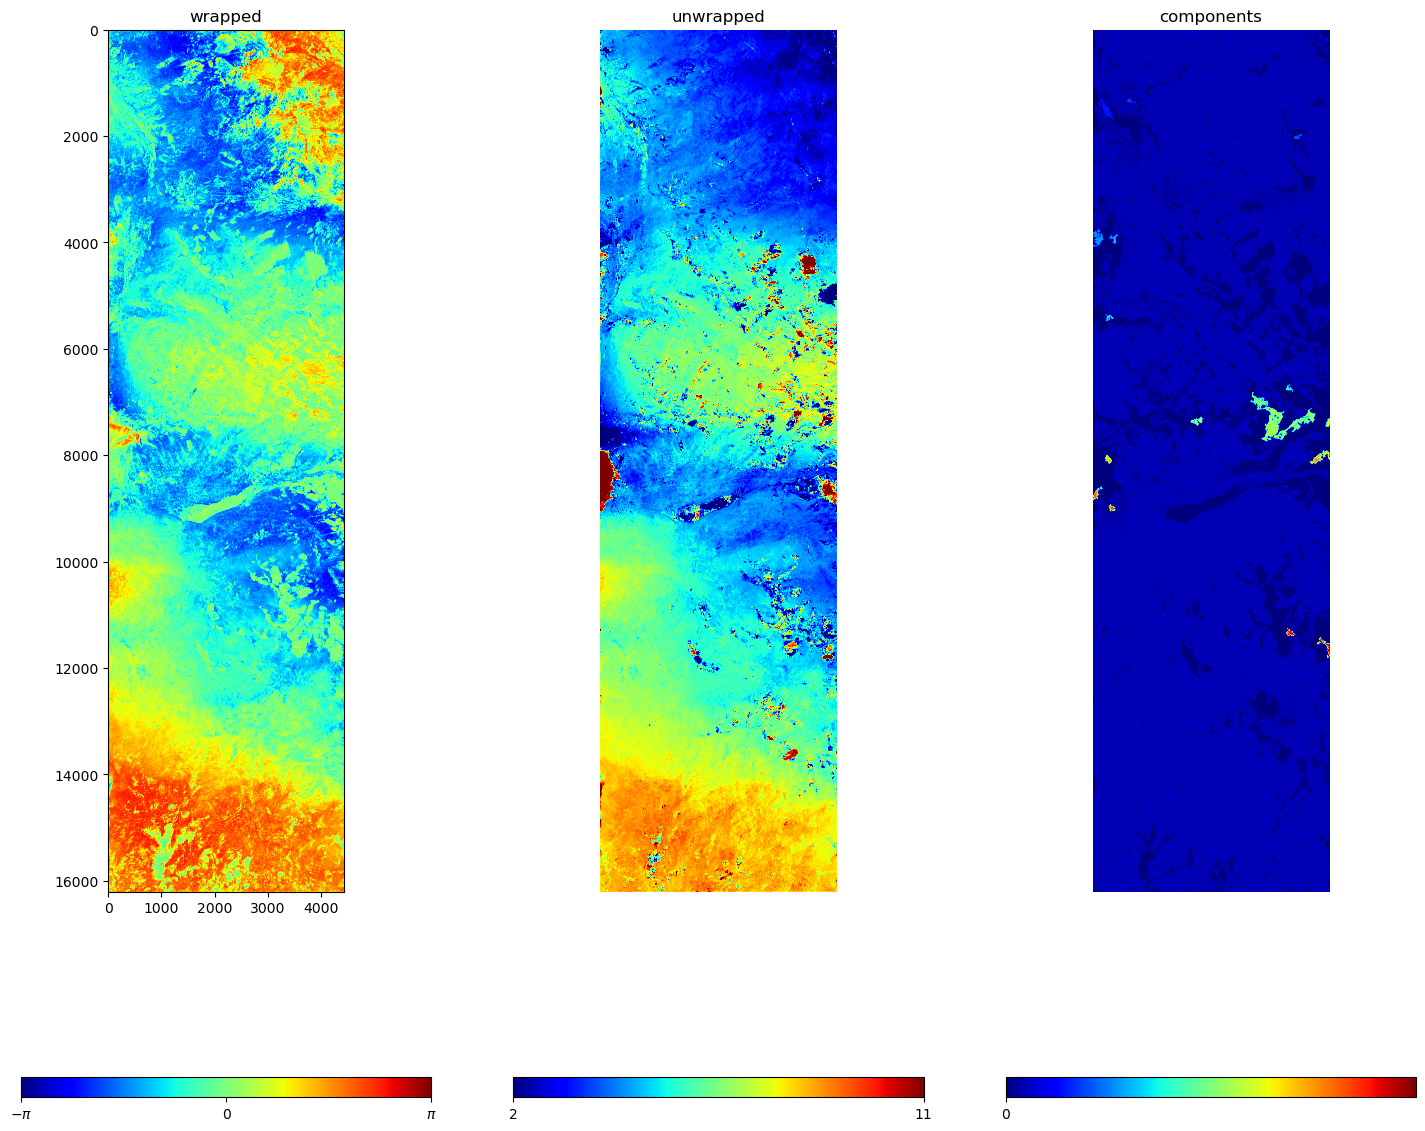

In [47]:
# plot

# reading the multi-looked wrapped interferogram
ds = gdal.Open("int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.int", gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

# reading the multi-looked unwrapped interferogram
ds = gdal.Open("int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw", gdal.GA_ReadOnly)
igram_unw = ds.GetRasterBand(2).ReadAsArray()
ds = None

# reading the connected component file
ds = gdal.Open("int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw.conncomp", gdal.GA_ReadOnly)
connected_components = ds.GetRasterBand(1).ReadAsArray()
ds = None

fig = plt.figure(figsize=(18, 16))

ax = fig.add_subplot(1,3,1)
cax=ax.imshow(np.angle(igram), cmap='jet')
ax.set_title("wrapped")
#ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[-3.14,0,3.14],orientation='horizontal')
cbar.ax.set_xticklabels(["$-\pi$",0,"$\pi$"])

ax = fig.add_subplot(1,3,2)
cax = ax.imshow(igram_unw, vmin = 2, vmax = 11, cmap = 'jet')
ax.set_title("unwrapped")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[2,0,11], orientation='horizontal')


ax = fig.add_subplot(1,3,3)
cax = ax.imshow(connected_components, cmap = 'jet')
ax.set_title("components")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[0,21] , orientation='horizontal')
cbar.ax.set_xticklabels([0,21])


connected_components = None

In [ ]:
!gdalinfo int/20200226T2253_20200311T1852/20200226T2253_20200311T1852.unw_snaphu.unw.vrt

## geocode

In [ ]:
# combine llh files


In [21]:
# path to your unw.vrt
in_fp = '/Users/jtarrico/sierra_isce_multi/int_orginal/20200131T1903_20200212T2211/20200131T1903_20200212T2211.unw_snaphu.unw.vrt'

# path to annotation file
ann_fp = '/Users/jtarrico/sierra_isce_multi/download/sierra_17305_20002_001_200131_L090VV_01_BC.ann'

# where the .tif is being save
out_dir = '/Users/jtarrico/sierra_isce_multi/geocode_test'

# path to lat/lon/height file
llh_fp = '/Users/jtarrico/sierra_isce_multi/download/sierra_17305_01_BC_s1_2x8.llh'

In [22]:
# run geolocate function
geolocated_data = geolocate_uavsar(in_fp = in_fp, ann_fp = ann_fp, out_dir = out_dir, llh_fp = llh_fp)
print(geolocated_data[0])

2023-11-16 16:56:33,045 - rasterio.env - DEBUG - Entering env context: <rasterio.env.Env object at 0x1a66723d0>
2023-11-16 16:56:33,047 - rasterio.env - DEBUG - Starting outermost env
2023-11-16 16:56:33,048 - rasterio.env - DEBUG - No GDAL environment exists
2023-11-16 16:56:33,049 - rasterio.env - DEBUG - New GDAL environment <rasterio._env.GDALEnv object at 0x1a6686fd0> created
2023-11-16 16:56:33,051 - rasterio._env - DEBUG - GDAL_DATA found in environment.
2023-11-16 16:56:33,053 - rasterio._env - DEBUG - PROJ_DATA found in environment.
2023-11-16 16:56:33,054 - rasterio._env - DEBUG - Started GDALEnv: self=<rasterio._env.GDALEnv object at 0x1a6686fd0>.
2023-11-16 16:56:33,056 - rasterio.env - DEBUG - Entered env context: <rasterio.env.Env object at 0x1a66723d0>
2023-11-16 16:56:33,057 - rasterio._io - DEBUG - Path: _UnparsedPath(path='/Users/jtarrico/sierra_isce_multi/geocode_test/tmp/llh.lat.tif'), mode: w, driver: GTiff
2023-11-16 16:56:33,059 - rasterio._io - DEBUG - Skipped d

/Users/jtarrico/miniconda/envs/isce2_env/lib/python3.9/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


2023-11-16 16:56:33,337 - rasterio.env - DEBUG - Exiting env context: <rasterio.env.Env object at 0x1a6370e20>
2023-11-16 16:56:33,339 - rasterio.env - DEBUG - Cleared existing <rasterio._env.GDALEnv object at 0x1a6686fd0> options
2023-11-16 16:56:33,340 - rasterio._env - DEBUG - Stopped GDALEnv <rasterio._env.GDALEnv object at 0x1a6686fd0>.
2023-11-16 16:56:33,341 - rasterio.env - DEBUG - Exiting outermost env
2023-11-16 16:56:33,342 - rasterio.env - DEBUG - Exited env context: <rasterio.env.Env object at 0x1a6370e20>
2023-11-16 16:56:33,343 - rasterio.env - DEBUG - Entering env context: <rasterio.env.Env object at 0x1a66723d0>
2023-11-16 16:56:33,344 - rasterio.env - DEBUG - Starting outermost env
2023-11-16 16:56:33,346 - rasterio.env - DEBUG - No GDAL environment exists
2023-11-16 16:56:33,347 - rasterio.env - DEBUG - New GDAL environment <rasterio._env.GDALEnv object at 0x1a6686d60> created
2023-11-16 16:56:33,349 - rasterio._env - DEBUG - GDAL_DATA found in environment.
2023-11-1

/Users/jtarrico/miniconda/envs/isce2_env/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


2023-11-16 16:56:34,421 - rasterio.env - DEBUG - Exiting env context: <rasterio.env.Env object at 0x1a6686fd0>
2023-11-16 16:56:34,422 - rasterio.env - DEBUG - Cleared existing <rasterio._env.GDALEnv object at 0x1a66ae310> options
2023-11-16 16:56:34,424 - rasterio._env - DEBUG - Stopped GDALEnv <rasterio._env.GDALEnv object at 0x1a66ae310>.
2023-11-16 16:56:34,426 - rasterio.env - DEBUG - Exiting outermost env
2023-11-16 16:56:34,428 - rasterio.env - DEBUG - Exited env context: <rasterio.env.Env object at 0x1a6686fd0>
2023-11-16 16:56:34,430 - rasterio.env - DEBUG - Entering env context: <rasterio.env.Env object at 0x1a6767370>
2023-11-16 16:56:34,432 - rasterio.env - DEBUG - Starting outermost env
2023-11-16 16:56:34,437 - rasterio.env - DEBUG - No GDAL environment exists
2023-11-16 16:56:34,439 - rasterio.env - DEBUG - New GDAL environment <rasterio._env.GDALEnv object at 0x1a61fdd00> created
2023-11-16 16:56:34,441 - rasterio._env - DEBUG - GDAL_DATA found in environment.
2023-11-1

/Users/jtarrico/miniconda/envs/isce2_env/lib/python3.9/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


2023-11-16 16:56:35,645 - rasterio.env - DEBUG - Exiting env context: <rasterio.env.Env object at 0x1a6686fd0>
2023-11-16 16:56:35,648 - rasterio.env - DEBUG - Cleared existing <rasterio._env.GDALEnv object at 0x1a6370e20> options
2023-11-16 16:56:35,650 - rasterio._env - DEBUG - Stopped GDALEnv <rasterio._env.GDALEnv object at 0x1a6370e20>.
2023-11-16 16:56:35,653 - rasterio.env - DEBUG - Exiting outermost env
2023-11-16 16:56:35,656 - rasterio.env - DEBUG - Exited env context: <rasterio.env.Env object at 0x1a6686fd0>
Ignore the error message: Unable to compute bounds. It is related
                to the pixels created by the conversion along the edge of topography.
                Error message is known and should not be an issue.
/Users/jtarrico/sierra_isce_multi/geocode_test/20200131T1903_20200212T2211.unw_snaphu.unw.tif.unw.tif


In [1]:
# path to your unw.vrt
in_fp = 'igrams/20200226T2253_20200311T1852/20200226T2253_20200311T1852.coh.vrt'

# path to annotation file
ann_fp = '/Users/jtarrico/sierra_isce/SLC/20200226T2253/sierra_17305_20014_000_200226_L090VV_01_BC.ann'

# where the .tif is being save
out_dir = '/Users/jtarrico/sierra_isce/geocode_test'

# path to lat/lon/height file
llh_fp = '/Users/jtarrico/sierra_isce/download/sierra_17305_01_BC_s1_2x8.llh'

# coh_geo = geolocate_uavsar(in_fp = in_fp, ann_fp = ann_fp, out_dir = out_dir, llh_fp = llh_fp)
# print(coh_geo[0])

In [ ]:
# path to your unw.vrt
in_fp = 'igrams/20200226T2253_20200311T1852/20200226T2253_20200311T1852.unw_snaphu.unw.conncomp.vrt'

# path to annotation file
ann_fp = '/Users/jtarrico/sierra_isce/SLC/20200226T2253/sierra_17305_20014_000_200226_L090VV_01_BC.ann'

# where the .tif is being save
out_dir = '/Users/jtarrico/sierra_isce/geocode_test'

# path to lat/lon/height file
llh_fp = '/Users/jtarrico/sierra_isce/download/sierra_17305_01_BC_s1_2x8.llh'

concomp_geo = geolocate_uavsar(in_fp = in_fp, ann_fp = ann_fp, out_dir = out_dir, llh_fp = llh_fp)
print(concomp_geo[0])

In [ ]:
# Plot geolocated unwrapped phase data!
with rio.open(geolocated_data[0]) as src:
    plt.subplots(1, figsize=(15, 15))
    show(src, vmin = -3, vmax = 3) 